In [307]:
import os
import pandas as pd
import numpy as np
import sys

from dotenv import load_dotenv
from openai import AzureOpenAI

from langchain_openai import AzureChatOpenAI
from langchain_core.messages import HumanMessage

import csv
import json
import time
from datetime import date, datetime

# Get datasets

In [126]:
# Get labeled dataset 1.1
file_path = 'C:\\Users\\Denis_Davydov2\\OneDrive - EPAM\\Prophet_AI_docs\\Datasets\\AI_skills\\Skills_dynamics\\'
file_name = 'intermediate_gpt4mini_370.csv'
gpt5mini_1 = pd.read_csv(file_path+file_name)
print("File read: ", file_name)


gpt4mini_1

File read:  intermediate_gpt4mini_370.csv


,text_id,skill_name,confirmation
0,80,LLM Application Engineering,This puts a local LLM in the hands of 3.7 bill...
1,80,AI Agent Engineering,Shopify and OpenAI Agent Integration : person_...
2,80,AI Data Engineering,"The blueprint details the models architecture,..."
3,80,Model Quantization and Mixed Precision,It achieves an Artificial Analysis Intelligenc...
4,80,Speech and Vision AI,The image shows the practical demonstration of...
...,...,...,...
10624,370,AI Strategy and Integration,Apple Integration Potential : person_733 outli...
10625,370,AI Model Fine-Tuning,The platform celebrated 1M model downloads as ...
10626,370,AI Inference Engineering,GPU Utilization : Many discussions revolve aro...
10627,370,LLM Integration and Deployment,These models boast enhanced capabilities like ...


In [128]:
# Get labeled dataset 1.2
file_path = 'C:\\Users\\Denis_Davydov2\\OneDrive - EPAM\\Prophet_AI_docs\\Datasets\\AI_skills\\Skills_dynamics\\'
file_name = 'intermediate_gpt5mini_412.csv'
gpt5mini_3 = pd.read_csv(file_path+file_name)
print("File read: ", file_name)


gpt5mini_3

File read:  intermediate_gpt5mini_412.csv


,text_id,skill_name,confirmation
0,371,Model Quantization and Mixed Precision,Interests in running LLMs locally sparked conv...
1,371,Llama Stack Engineering,Llama 3 Fine-Tuning Advancements : The communi...
2,371,Hugging Face Transformer Engineering,HuggingFace discussion Members sought guidance...
3,371,Prompt Engineering and Security,Techniques to handle complex tasks like multi-...
4,371,AI Memory Optimization,"Introduction of the YOCO architecture , a deco..."
...,...,...,...
1368,412,AI Monitoring and Observability,Users requested one-week filters on OpenRouter...
1369,412,AI Safety and Governance,OpenAI restricted ChatGPT from medical/legal a...
1370,412,AI Model Debugging,"Unsloth announced a DeepSeek-OCR notebook , bu..."
1371,412,AI Scalability Engineering,Google is prototyping scalable ML compute syst...


In [129]:
# Get labeled dataset 1.3
file_path = 'C:\\Users\\Denis_Davydov2\\OneDrive - EPAM\\Prophet_AI_docs\\Datasets\\AI_skills\\Skills_dynamics\\'
file_name = 'intermediate_gpt5mini_80.csv'
gpt5mini_2 = pd.read_csv(file_path+file_name)
print("File read: ", file_name)
gpt5mini_2

File read:  intermediate_gpt5mini_80.csv


,text_id,skill_name,confirmation
0,0,AI Content Moderation,They interpret custom policies and classify me...
1,0,Open-Source Model Management,They interpret custom policies and classify me...
2,0,Llama Stack Engineering,They interpret custom policies and classify me...
3,0,AI Safety and Governance,"OpenAIs gpt-oss-safeguard (20B, 120B) : Two op..."
4,0,Sparse Latent Representation Engineering,Cheaper alternative to LLM-as-judge : Goodfire...
...,...,...,...
3708,79,Mixture of Experts Engineering,"FlexOlmo , a model based on a novel distribute..."
3709,79,NLP Distillation and Data Curation,A member created a synthetic aider dataset for...
3710,79,AI Strategy and Integration,"person_708 argues that for AI to have a rapid,..."
3711,79,AI Process Automation,Comet can browse across tabs to pull informati...


In [131]:
gpt5mini =pd.concat([gpt5mini_2, gpt5mini_1, gpt5mini_3], axis=0)
gpt5mini['attribution_model'] = 'gpt5mini'
gpt5mini

,text_id,skill_name,confirmation,attribution_model
0,0,AI Content Moderation,They interpret custom policies and classify me...,gpt5mini
1,0,Open-Source Model Management,They interpret custom policies and classify me...,gpt5mini
2,0,Llama Stack Engineering,They interpret custom policies and classify me...,gpt5mini
3,0,AI Safety and Governance,"OpenAIs gpt-oss-safeguard (20B, 120B) : Two op...",gpt5mini
4,0,Sparse Latent Representation Engineering,Cheaper alternative to LLM-as-judge : Goodfire...,gpt5mini
...,...,...,...,...
1368,412,AI Monitoring and Observability,Users requested one-week filters on OpenRouter...,gpt5mini
1369,412,AI Safety and Governance,OpenAI restricted ChatGPT from medical/legal a...,gpt5mini
1370,412,AI Model Debugging,"Unsloth announced a DeepSeek-OCR notebook , bu...",gpt5mini
1371,412,AI Scalability Engineering,Google is prototyping scalable ML compute syst...,gpt5mini


In [132]:
# Get labeled dataset 2
file_path = 'C:\\Users\\Denis_Davydov2\\OneDrive - EPAM\\Prophet_AI_docs\\Datasets\\AI_skills\\Skills_dynamics\\'
file_name = 'gpt41mini.csv'
gpt41mini = pd.read_csv(file_path+file_name)
print("File read: ", file_name)
gpt41mini['attribution_model'] = 'gpt41mini'
gpt41mini

File read:  gpt41mini.csv


,text_id,skill_name,confirmation,attribution_model
0,0,AI Agent Engineering,Composer1 (agentic coding model) : Major IDE u...,gpt41mini
1,0,Model Quantization and Mixed Precision,Cheaper alternative to LLM-as-judge : Goodfire...,gpt41mini
2,0,AI Data Engineering,"Agent Data Protocol (ADP) : A unified, open st...",gpt41mini
3,0,Reinforcement Learning Engineering,Composer1 is an RLtrained MoE optimized for sp...,gpt41mini
4,0,LLM Application Engineering,"OpenAIs gpt-oss-safeguard (20B, 120B) : Two op...",gpt41mini
...,...,...,...,...
14152,412,AI Safety and Governance,The paper warning against AI developing commun...,gpt41mini
14153,412,Distributed Training and Inference,Tritex repo enabled from-scratch LLM pre-train...,gpt41mini
14154,412,Cloud AI Engineering,Debates raged on Tinybox Pro V2's value versus...,gpt41mini
14155,412,AI Strategy and Integration,Discussions about EU AI Act hindering Western ...,gpt41mini


In [134]:
# Get labeled dataset 3.1
file_path = 'C:\\Users\\Denis_Davydov2\\OneDrive - EPAM\\Prophet_AI_docs\\Datasets\\AI_skills\\Skills_dynamics\\'
file_name = 'intermediate_hiku45_349.csv'
hiku45_1 = pd.read_csv(file_path+file_name)
print("File read: ", file_name)
hiku45_1['attribution_model'] = 'hiku45'
hiku45_1

File read:  intermediate_hiku45_349.csv


,text_id,skill_name,confirmation,attribution_model
0,0,AI Safety and Governance,Two open-weight reasoning models for policy-ba...,hiku45
1,0,LLM Application Engineering,fine-tuned from gpt-oss and released under Apa...,hiku45
2,0,AI Agent Engineering,Major IDE update focused on agent workflows: m...,hiku45
3,0,Mixture of Experts Engineering,Composer1 is an RL-trained MoE optimized for s...,hiku45
4,0,Model Quantization and Mixed Precision,Goodfire + Rakuten show sparse autoencoders (S...,hiku45
...,...,...,...,...
15272,349,Content Provenance Engineering,Teens are spreading deepfake nudes of one anot...,hiku45
15273,349,AI Data Engineering,Character Codex releases an open dataset with ...,hiku45
15274,349,Energy Efficient AI Engineering,A custom FPGA solution processes billion-param...,hiku45
15275,349,Computer Vision Segmentation and Tracking,"Restaurant robots advance to now cook, serve a...",hiku45


In [135]:
# Get labeled dataset 3.2
file_path = 'C:\\Users\\Denis_Davydov2\\OneDrive - EPAM\\Prophet_AI_docs\\Datasets\\AI_skills\\Skills_dynamics\\'
file_name = 'intermediate_hiku45_412.csv'
hiku45_2 = pd.read_csv(file_path+file_name)
print("File read: ", file_name)
hiku45_2['attribution_model'] = 'hiku45'
hiku45_2

File read:  intermediate_hiku45_412.csv


,text_id,skill_name,confirmation,attribution_model
0,350,LLM Application Engineering,Apple is partnering with OpenAI to integrate C...,hiku45
1,350,Model Quantization and Mixed Precision,Apple uses quantized task-specific LoRAs calle...,hiku45
2,350,On-Device AI Deployment,"Apple Intelligence will run on-device, with on...",hiku45
3,350,AI Security Engineering,person_980 detailed the security measures Appl...,hiku45
4,350,Speech and Vision AI,"person_178 shared Microsoft's VALL-E 2, which ...",hiku45
...,...,...,...,...
2324,412,AI Content Moderation,The BlackHawk model ignited debates for its fi...,hiku45
2325,412,Llama Stack Engineering,llama.cpp releases new official WebUI develope...,hiku45
2326,412,Diffusion Model Engineering,Users favored local AMD cards for tasks like s...,hiku45
2327,412,AI Agent Engineering,Minimax M2 climbed to #4 overall dazzling user...,hiku45


In [330]:
hiku45 =pd.concat([hiku45_1, hiku45_2], axis=0)

hiku45

,text_id,skill_name,confirmation,attribution_model
0,0,AI Safety and Governance,Two open-weight reasoning models for policy-ba...,hiku45
1,0,LLM Application Engineering,fine-tuned from gpt-oss and released under Apa...,hiku45
2,0,AI Agent Engineering,Major IDE update focused on agent workflows: m...,hiku45
3,0,Mixture of Experts Engineering,Composer1 is an RL-trained MoE optimized for s...,hiku45
4,0,Model Quantization and Mixed Precision,Goodfire + Rakuten show sparse autoencoders (S...,hiku45
...,...,...,...,...
2324,412,AI Content Moderation,The BlackHawk model ignited debates for its fi...,hiku45
2325,412,Llama Stack Engineering,llama.cpp releases new official WebUI develope...,hiku45
2326,412,Diffusion Model Engineering,Users favored local AMD cards for tasks like s...,hiku45
2327,412,AI Agent Engineering,Minimax M2 climbed to #4 overall dazzling user...,hiku45


In [137]:
# Get labeled dataset 4
file_path = 'C:\\Users\\Denis_Davydov2\\OneDrive - EPAM\\Prophet_AI_docs\\Datasets\\AI_skills\\Skills_dynamics\\'
file_name = 'sonnet37.csv'
sonnet37 = pd.read_csv(file_path+file_name)
print("File read: ", file_name)
sonnet37['attribution_model'] = 'claude37sonnet'
sonnet37

File read:  sonnet37.csv


,text_id,skill_name,confirmation,attribution_model
0,0.0,Open-Source Model Management,"OpenAIs gpt-oss-safeguard (20B, 120B) : Two op...",claude37sonnet
1,0.0,AI Agent Engineering,Cursor 2.0 and Composer1 (agentic coding model...,claude37sonnet
2,0.0,AI-Assisted Software Development,Cursor 2.0 and Composer1 (agentic coding model...,claude37sonnet
3,0.0,Speech and Vision AI,Cursor 2.0 and Composer1 (agentic coding model...,claude37sonnet
4,0.0,Distributed Training and Inference,Cognition SWE1.5 (Windsurf) : A fast agent mod...,claude37sonnet
...,...,...,...,...
9303,411.0,Vision-Language Model Engineering,Perceptrons Physical AI platform: A new API an...,claude37sonnet
9304,412.0,AI Data Center Engineering,Google is prototyping scalable ML compute syst...,claude37sonnet
9305,412.0,GPU Performance Engineering,"In parallel, Epoch launched an open Frontier D...",claude37sonnet
9306,412.0,Energy Efficient AI Engineering,Googles Project Suncatcher (TPUs in space): Go...,claude37sonnet


In [220]:

# Get labeled dataset 5
file_path = 'C:\\Users\\Denis_Davydov2\\OneDrive - EPAM\\Prophet_AI_docs\\Datasets\\AI_skills\\Skills_dynamics\\'
file_name = 'claude35sonnet.csv'
sonnet35 = pd.read_csv(file_path+file_name)
print("File read: ", file_name)
sonnet35['attribution_model'] = 'claude35sonnet'
sonnet35

File read:  claude35sonnet.csv


,text_id,skill_name,confirmation,attribution_model
0,0,AI Model Fine-Tuning,Two open-weight reasoning models for policy-ba...,claude35sonnet
1,0,AI Performance and Cost Optimization,Early users emphasize the fast-not-slowest tra...,claude35sonnet
2,0,Mixture of Experts Engineering,Composer1 is an RLtrained MoE optimized for sp...,claude35sonnet
3,0,Distributed Training and Inference,AWS detailed a large Trainium2 clusternearly 5...,claude35sonnet
4,0,Machine Learning Pipeline Engineering,Nocode builder that creates Claude Codestyle d...,claude35sonnet
...,...,...,...,...
2639,411,Speech and Vision AI,A new API and Python SDK targeting multimodal ...,claude35sonnet
2640,411,AI Performance and Cost Optimization,Evidence that 20B-active-param local models im...,claude35sonnet
2641,412,AI Data Center Engineering,Deutsche Telekom and NVIDIA announced a $1.1B ...,claude35sonnet
2642,412,GPU Performance Engineering,Google is prototyping scalable ML compute syst...,claude35sonnet


In [221]:

# Get labeled dataset 6
file_path = 'C:\\Users\\Denis_Davydov2\\OneDrive - EPAM\\Prophet_AI_docs\\Datasets\\AI_skills\\Skills_dynamics\\'
file_name = 'gpt4omini.csv'
gpt4omini = pd.read_csv(file_path+file_name)
print("File read: ", file_name)
gpt4omini['attribution_model'] = 'gpt4omini'
gpt4omini

File read:  gpt4omini.csv


,text_id,skill_name,confirmation,attribution_model
0,0,AI Security Engineering,"OpenAIs gpt-oss-safeguard (20B, 120B) : Two op...",gpt4omini
1,0,AI Model Fine-Tuning,They interpret custom policies and classify me...,gpt4omini
2,0,AI Performance and Cost Optimization,Goodfire + Rakuten show sparse autoencoders (S...,gpt4omini
3,0,Reinforcement Learning Engineering,Composer1 is an RL-trained MoE optimized for s...,gpt4omini
4,0,AI Data Engineering,"A unified, open standard for agent SFT dataset...",gpt4omini
...,...,...,...,...
5518,412,AI Model Fine-Tuning,Users requested one-week filters on OpenRouter...,gpt4omini
5519,412,Automated Detection and Response,The post clarifies that the AIs performance is...,gpt4omini
5520,412,AI Evaluation and Benchmarking,Epoch AI slammed the OSWorld benchmark for sim...,gpt4omini
5521,412,Voice AI Engineering,Coca-Cola has released its 2025 Christmas adve...,gpt4omini


In [308]:
# Get labeled dataset 7 (similarity embeddings model)
file_path = 'C:\\Users\\Denis_Davydov2\\OneDrive - EPAM\\Prophet_AI_docs\\Datasets\\AI_skills\\Skills_dynamics\\'
file_name = 'embed_smlr.csv'
embed_smlr = pd.read_csv(file_path+file_name)
print("File read: ", file_name)
embed_smlr['attribution_model'] = 'embed_smlr'
embed_smlr['confirmation'] = ''
embed_smlr

File read:  embed_smlr.csv


,text_id,skill_name,attribution_model,confirmation
0,1,LLM Application Engineering,embed_smlr,
1,4,LLM Application Engineering,embed_smlr,
2,8,LLM Application Engineering,embed_smlr,
3,9,LLM Application Engineering,embed_smlr,
4,11,LLM Application Engineering,embed_smlr,
...,...,...,...,...
7985,399,Serverless AI Engineering,embed_smlr,
7986,400,Serverless AI Engineering,embed_smlr,
7987,401,Serverless AI Engineering,embed_smlr,
7988,404,Serverless AI Engineering,embed_smlr,


In [331]:
# Get labeled dataset 8.1
file_path = 'C:\\Users\\Denis_Davydov2\\OneDrive - EPAM\\Prophet_AI_docs\\Datasets\\AI_skills\\Skills_dynamics\\'
file_name = 'interim_claude_haiku45r2_369.csv'
haiku45_think_1 = pd.read_csv(file_path+file_name)
print("File read: ", file_name)
haiku45_think_1['attribution_model'] = 'haiku45_think'
haiku45_think_1

File read:  interim_claude_haiku45r2_369.csv


,text_id,skill_name,confirmation,attribution_model
0,0,AI Safety and Governance,Two open-weight reasoning models for policy-ba...,haiku45_think
1,0,AI Content Moderation,Goodfire + Rakuten show sparse autoencoders (S...,haiku45_think
2,0,AI Agent Engineering,Major IDE update focused on agent workflows: m...,haiku45_think
3,0,Reinforcement Learning Engineering,Composer1 is an RL-trained MoE optimized for s...,haiku45_think
4,0,Mixture of Experts Engineering,Composer1 is an RL-trained MoE optimized for s...,haiku45_think
...,...,...,...,...
14309,369,AI Safety and Governance,"Jan Leike, co-head of OpenAIs Superalignment t...",haiku45_think
14310,369,Open-Source Model Management,person_054 released the open-source Qwen1.5-11...,haiku45_think
14311,369,AI Compliance and Licensing,Metas Llama-3 model shows promise but its rest...,haiku45_think
14312,369,AI Strategy and Integration,Members discussed the strategic need for AI co...,haiku45_think


In [332]:
# Get labeled dataset 8.2
file_path = 'C:\\Users\\Denis_Davydov2\\OneDrive - EPAM\\Prophet_AI_docs\\Datasets\\AI_skills\\Skills_dynamics\\'
file_name = 'interim_claude_haiku45r2_412.csv'
haiku45_think_2 = pd.read_csv(file_path+file_name)
print("File read: ", file_name)
haiku45_think_2['attribution_model'] = 'haiku45_think'
haiku45_think_2

File read:  interim_claude_haiku45r2_412.csv


,text_id,skill_name,confirmation,attribution_model
0,370,LLM Application Engineering,"GPT-4o is available to all ChatGPT users, incl...",haiku45_think
1,370,Multimodal AI Engineering,"GPT-4o is noted to reason across text, audio, ...",haiku45_think
2,370,Speech and Vision AI,GPT-4o has improved audio parsing abilities li...,haiku45_think
3,370,Generative Media Engineering,GPT-4o has improved image generation capabilit...,haiku45_think
4,370,AI Performance and Cost Optimization,GPT-4o is half the price of GPT-4 Turbo and 12...,haiku45_think
...,...,...,...,...
1351,412,AI Compliance and Licensing,Getty Images mostly lost its UK suit against a...,haiku45_think
1352,412,Distributed Training and Inference,The Fenic dataframe API integrated with OpenRo...,haiku45_think
1353,412,AI Performance and Cost Optimization,Global shortages pushed cloud GPU rates to $2/...,haiku45_think
1354,412,AI Monitoring and Observability,Roblox open-sourced its PII Classifier on Hugg...,haiku45_think


In [333]:
# Concat haiku45_think datasets
haiku45_think =pd.concat([haiku45_think_1, haiku45_think_2], axis=0)
haiku45_think

,text_id,skill_name,confirmation,attribution_model
0,0,AI Safety and Governance,Two open-weight reasoning models for policy-ba...,haiku45_think
1,0,AI Content Moderation,Goodfire + Rakuten show sparse autoencoders (S...,haiku45_think
2,0,AI Agent Engineering,Major IDE update focused on agent workflows: m...,haiku45_think
3,0,Reinforcement Learning Engineering,Composer1 is an RL-trained MoE optimized for s...,haiku45_think
4,0,Mixture of Experts Engineering,Composer1 is an RL-trained MoE optimized for s...,haiku45_think
...,...,...,...,...
1351,412,AI Compliance and Licensing,Getty Images mostly lost its UK suit against a...,haiku45_think
1352,412,Distributed Training and Inference,The Fenic dataframe API integrated with OpenRo...,haiku45_think
1353,412,AI Performance and Cost Optimization,Global shortages pushed cloud GPU rates to $2/...,haiku45_think
1354,412,AI Monitoring and Observability,Roblox open-sourced its PII Classifier on Hugg...,haiku45_think


## Concat all datasets

In [334]:
# Concat all datasets
all_datasets = pd.concat([gpt5mini, hiku45, sonnet35, sonnet37, gpt41mini, gpt4omini, embed_smlr, haiku45_think], axis=0)
print(all_datasets['attribution_model'].value_counts())
all_datasets

attribution_model
hiku45            17606
gpt5mini          15715
haiku45_think     15670
gpt41mini         14157
claude37sonnet     9308
embed_smlr         7990
gpt4omini          5523
claude35sonnet     2644
Name: count, dtype: int64


,text_id,skill_name,confirmation,attribution_model
0,0.0,AI Content Moderation,They interpret custom policies and classify me...,gpt5mini
1,0.0,Open-Source Model Management,They interpret custom policies and classify me...,gpt5mini
2,0.0,Llama Stack Engineering,They interpret custom policies and classify me...,gpt5mini
3,0.0,AI Safety and Governance,"OpenAIs gpt-oss-safeguard (20B, 120B) : Two op...",gpt5mini
4,0.0,Sparse Latent Representation Engineering,Cheaper alternative to LLM-as-judge : Goodfire...,gpt5mini
...,...,...,...,...
1351,412.0,AI Compliance and Licensing,Getty Images mostly lost its UK suit against a...,haiku45_think
1352,412.0,Distributed Training and Inference,The Fenic dataframe API integrated with OpenRo...,haiku45_think
1353,412.0,AI Performance and Cost Optimization,Global shortages pushed cloud GPU rates to $2/...,haiku45_think
1354,412.0,AI Monitoring and Observability,Roblox open-sourced its PII Classifier on Hugg...,haiku45_think


## Cleaning

In [335]:
# Remove 'Other: ' prefix from skill_name values
all_datasets['skill_name'] = all_datasets['skill_name'].str.replace('Other: ', '', regex=False)
print("Removed 'Other: ' prefix from skill_name column")
print("\nSample of updated skill names:")



all_datasets['skill_name'] = all_datasets['skill_name'].replace({
    'AI Assisted Software Development' : 'AI-Assisted Software Development',
    'AI Safety Engineering' : 'AI Safety and Governance',
    'Prompt Engineering and Security' : 'Prompt Engineering',
    "AI Ethics and Governance": "AI Safety and Governance",
    "AI Integration and Deployment": "AI Development Environment Integration",
    "Experimental and Test Automation": "Experimentation and Test Automation",
    "AI Benchmarking and Evaluation": "AI Evaluation and Benchmarking",
    "RAG Engineering": "Advanced RAG Engineering",
    "Context Engineering": "LLM Context Engineering",
    "AI Model Evaluation and Benchmarking": "AI Evaluation and Benchmarking",
    "AI Context Engineering": "LLM Context Engineering",
    "AI Model Benchmarking": "AI Evaluation and Benchmarking",
    "Benchmarking and Evaluation": "AI Evaluation and Benchmarking",
    "Embeddings Engineering": "Embedding Engineering",
    "Conversation AI Engineering": "Conversational AI Engineering",
    "Large Language Model Engineering": "LLM Application Engineering",
    "AI Monitor and Observability": "AI Monitoring and Observability",
    "LLM Model Fine-Tuning": "AI Model Fine-Tuning",
    "AI Developer Environment Integration": "AI Development Environment Integration",
    "Transformers Attention Optimization": "Transformer Attention Optimization",
    "AI Tool Integration": "LLM Tool Integration",
    "AI Applications and Platform Engineering": "AI Application and Platform Engineering",
    "Model Fine-Tuning": "AI Model Fine-Tuning",
    "Quantization and Mixed Precision": "Model Quantization and Mixed Precision",
    "AI Governance": "AI Safety and Governance",
    "MLOps Pipeline Engineering": "Machine Learning Pipeline Engineering",
    "AI Scaling Engineering": "AI Scalability Engineering"
})
all_datasets

Removed 'Other: ' prefix from skill_name column

Sample of updated skill names:


,text_id,skill_name,confirmation,attribution_model
0,0.0,AI Content Moderation,They interpret custom policies and classify me...,gpt5mini
1,0.0,Open-Source Model Management,They interpret custom policies and classify me...,gpt5mini
2,0.0,Llama Stack Engineering,They interpret custom policies and classify me...,gpt5mini
3,0.0,AI Safety and Governance,"OpenAIs gpt-oss-safeguard (20B, 120B) : Two op...",gpt5mini
4,0.0,Sparse Latent Representation Engineering,Cheaper alternative to LLM-as-judge : Goodfire...,gpt5mini
...,...,...,...,...
1351,412.0,AI Compliance and Licensing,Getty Images mostly lost its UK suit against a...,haiku45_think
1352,412.0,Distributed Training and Inference,The Fenic dataframe API integrated with OpenRo...,haiku45_think
1353,412.0,AI Performance and Cost Optimization,Global shortages pushed cloud GPU rates to $2/...,haiku45_think
1354,412.0,AI Monitoring and Observability,Roblox open-sourced its PII Classifier on Hugg...,haiku45_think


In [350]:
# Leave only skills from skills list (exclude others)
# Get skills list
file_path = 'C:\\Users\\Denis_Davydov2\\OneDrive - EPAM\\Prophet_AI_docs\\Datasets\\AI_skills\\Clusters\\'
file_name = 'Skills_with_names_2025-11-19.csv'
skills = pd.read_csv(file_path+file_name)
print("File read: ", file_name)
skills


skills_list=(skills['skill_name'].tolist())
print(skills_list)

# Filter all_datasets to keep only rows where skill_name is in skills_list
all_datasets1 = all_datasets[all_datasets['skill_name'].isin(skills_list)]
print("\nAfter filtering by skills_list:")
print(all_datasets1['attribution_model'].value_counts())
print("\nTotal pairs of text_id and attribution_model after filtering: ", len(all_datasets1))

all_datasets1

File read:  Skills_with_names_2025-11-19.csv
['Accelerated Tensor Programming', 'Adaptive Decision Optimization', 'Advanced RAG Engineering', 'AI 3D Content Generation', 'AI Accelerator Engineering', 'AI Agent Engineering', 'AI API Engineering', 'AI Application and Platform Engineering', 'AI Compliance and Licensing', 'AI Computational Design', 'AI Content Moderation', 'AI Data Center Engineering', 'AI Data Engineering', 'AI Development Environment Integration', 'AI Evaluation and Benchmarking', 'AI Image Processing', 'AI Inference Caching', 'AI Inference Engineering', 'AI Memory Optimization', 'AI Model Debugging', 'AI Model Engineering', 'AI Model Fine-Tuning', 'AI Model Risk Management', 'AI Model Serving and Deployment', 'AI Monitoring and Observability', 'AI Performance and Cost Optimization', 'AI Personalization Engineering', 'AI Planning Systems', 'AI Privacy Engineering', 'AI Process Automation', 'AI Red Teaming', 'AI Reliability Engineering', 'AI Safety and Governance', 'AI Sc

,text_id,skill_name,confirmation,attribution_model
0,0.0,AI Content Moderation,They interpret custom policies and classify me...,gpt5mini
1,0.0,Open-Source Model Management,They interpret custom policies and classify me...,gpt5mini
2,0.0,Llama Stack Engineering,They interpret custom policies and classify me...,gpt5mini
3,0.0,AI Safety and Governance,"OpenAIs gpt-oss-safeguard (20B, 120B) : Two op...",gpt5mini
4,0.0,Sparse Latent Representation Engineering,Cheaper alternative to LLM-as-judge : Goodfire...,gpt5mini
...,...,...,...,...
1351,412.0,AI Compliance and Licensing,Getty Images mostly lost its UK suit against a...,haiku45_think
1352,412.0,Distributed Training and Inference,The Fenic dataframe API integrated with OpenRo...,haiku45_think
1353,412.0,AI Performance and Cost Optimization,Global shortages pushed cloud GPU rates to $2/...,haiku45_think
1354,412.0,AI Monitoring and Observability,Roblox open-sourced its PII Classifier on Hugg...,haiku45_think


In [337]:
# Cut rows by minimum texts for each model ()
all_datasets1['text_id'] = pd.to_numeric(all_datasets1['text_id'], errors='coerce')
#all_datasets = all_datasets[all_datasets['text_id']<=349]
print(all_datasets1['attribution_model'].value_counts())
all_datasets1

attribution_model
hiku45            17591
gpt5mini          15702
haiku45_think     15656
gpt41mini         14043
claude37sonnet     9189
embed_smlr         7990
gpt4omini          5423
claude35sonnet     2605
Name: count, dtype: int64


C:\Users\Denis_Davydov2\AppData\Local\Temp\ipykernel_6692\368950502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_datasets1['text_id'] = pd.to_numeric(all_datasets1['text_id'], errors='coerce')


,text_id,skill_name,confirmation,attribution_model
0,0.0,AI Content Moderation,They interpret custom policies and classify me...,gpt5mini
1,0.0,Open-Source Model Management,They interpret custom policies and classify me...,gpt5mini
2,0.0,Llama Stack Engineering,They interpret custom policies and classify me...,gpt5mini
3,0.0,AI Safety and Governance,"OpenAIs gpt-oss-safeguard (20B, 120B) : Two op...",gpt5mini
4,0.0,Sparse Latent Representation Engineering,Cheaper alternative to LLM-as-judge : Goodfire...,gpt5mini
...,...,...,...,...
1351,412.0,AI Compliance and Licensing,Getty Images mostly lost its UK suit against a...,haiku45_think
1352,412.0,Distributed Training and Inference,The Fenic dataframe API integrated with OpenRo...,haiku45_think
1353,412.0,AI Performance and Cost Optimization,Global shortages pushed cloud GPU rates to $2/...,haiku45_think
1354,412.0,AI Monitoring and Observability,Roblox open-sourced its PII Classifier on Hugg...,haiku45_think


# Analysis of Model Performance and Consistency

## 1. Model Performance: Categories per Text

Total pairs of text_id and attribution_model:  3296
Model Performance: Number of Categories Attributed per Text
                    mean  median    std  min  max
attribution_model                                
claude35sonnet      6.31     6.0   1.49    2   10
claude37sonnet     21.73    17.0  21.88    1  144
embed_smlr         19.35    19.0   7.93    3   42
gpt41mini          34.25    21.0  37.05    4  143
gpt4omini          13.13    13.0   5.74    5  106
gpt5mini           38.11    34.0  15.12   18  144
haiku45_think      37.91    33.0  17.95   10  126
hiku45             42.59    37.0  19.65    7  130




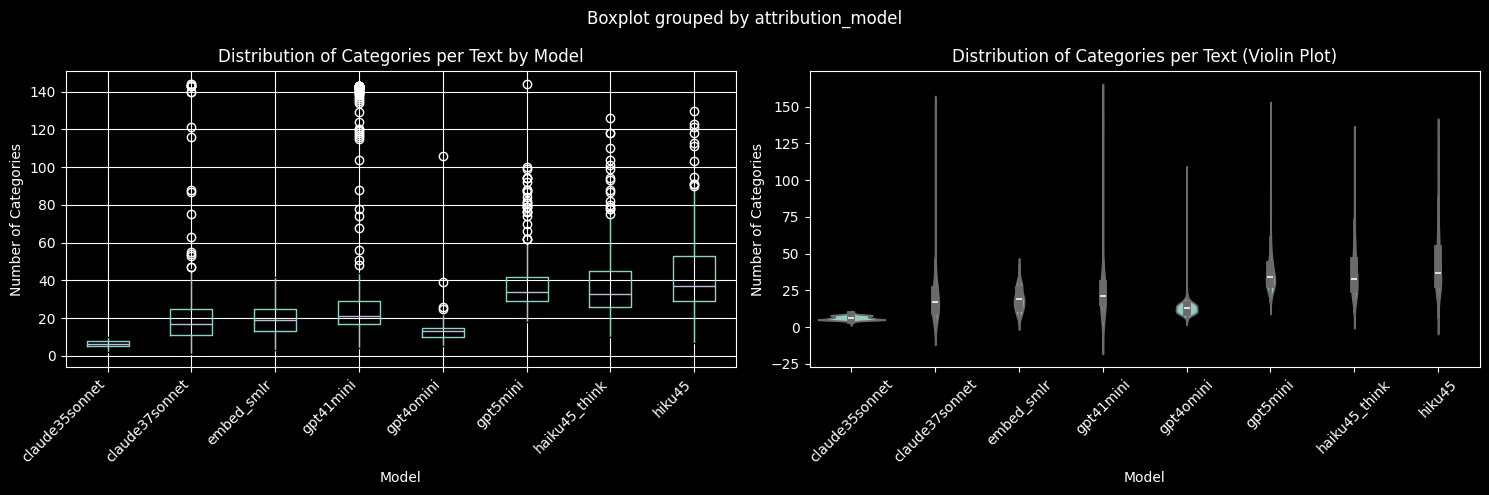

,mean,median,std,min,max
attribution_model,,,,,
claude35sonnet,6.31,6.0,1.49,2,10
claude37sonnet,21.73,17.0,21.88,1,144
embed_smlr,19.35,19.0,7.93,3,42
gpt41mini,34.25,21.0,37.05,4,143
gpt4omini,13.13,13.0,5.74,5,106
gpt5mini,38.11,34.0,15.12,18,144
haiku45_think,37.91,33.0,17.95,10,126
hiku45,42.59,37.0,19.65,7,130


In [338]:
# Calculate number of categories attributed per text by each model
categories_per_text = all_datasets1.groupby(['text_id', 'attribution_model'])['skill_name'].count().reset_index()
categories_per_text.columns = ['text_id', 'attribution_model', 'num_categories']
print("Total pairs of text_id and attribution_model: ", len(categories_per_text))

# Summary statistics by model
performance_summary = categories_per_text.groupby('attribution_model')['num_categories'].agg([
    'mean', 'median', 'std', 'min', 'max'
]).round(2)

print("Model Performance: Number of Categories Attributed per Text")
print("="*70)
print(performance_summary)
print("\n")

# Visual comparison
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot
categories_per_text.boxplot(column='num_categories', by='attribution_model', ax=axes[0])
axes[0].set_title('Distribution of Categories per Text by Model')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Number of Categories')
plt.sca(axes[0])
plt.xticks(rotation=45, ha='right')

# Violin plot
sns.violinplot(data=categories_per_text, x='attribution_model', y='num_categories', ax=axes[1])
axes[1].set_title('Distribution of Categories per Text (Violin Plot)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Number of Categories')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

performance_summary

## 2. Overall Consistency: How Similarly Models Annotated Texts

Matrix shape: (413, 144)
Text IDs: 413, Skills: 144

Pairwise Jaccard Similarity Between Models:
       Model 1        Model 2  Jaccard Similarity
      gpt5mini         hiku45              0.3994
      gpt5mini claude35sonnet              0.1139
      gpt5mini claude37sonnet              0.2608
      gpt5mini      gpt41mini              0.2513
      gpt5mini      gpt4omini              0.1398
      gpt5mini     embed_smlr              0.0931
      gpt5mini  haiku45_think              0.3853
        hiku45 claude35sonnet              0.1079
        hiku45 claude37sonnet              0.2631
        hiku45      gpt41mini              0.2524
        hiku45      gpt4omini              0.1315
        hiku45     embed_smlr              0.1059
        hiku45  haiku45_think              0.4442
claude35sonnet claude37sonnet              0.1762
claude35sonnet      gpt41mini              0.1000
claude35sonnet      gpt4omini              0.1431
claude35sonnet     embed_smlr              0.0401
cla

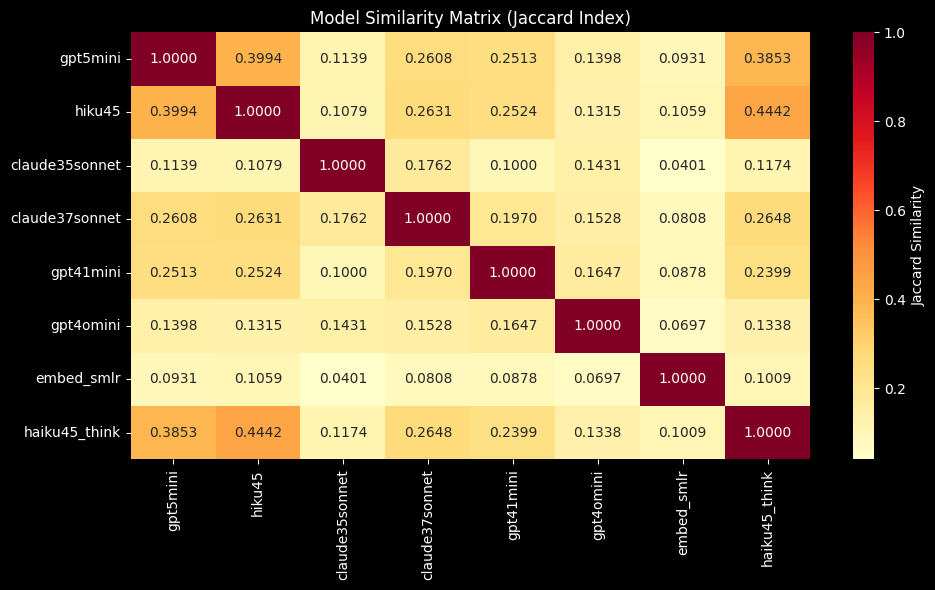

,Model 1,Model 2,Jaccard Similarity
0,gpt5mini,hiku45,0.3994
1,gpt5mini,claude35sonnet,0.1139
2,gpt5mini,claude37sonnet,0.2608
3,gpt5mini,gpt41mini,0.2513
4,gpt5mini,gpt4omini,0.1398
5,gpt5mini,embed_smlr,0.0931
6,gpt5mini,haiku45_think,0.3853
7,hiku45,claude35sonnet,0.1079
8,hiku45,claude37sonnet,0.2631
9,hiku45,gpt41mini,0.2524


In [348]:
# Create binary matrix: text_id x skill_name for each model
from sklearn.metrics import jaccard_score
from itertools import combinations

# Create pivot tables for each model
models = all_datasets1['attribution_model'].unique()
model_matrices = {}

for model in models:
    model_data = all_datasets1[all_datasets1['attribution_model'] == model]
    # Create binary matrix
    pivot = model_data.pivot_table(
        index='text_id', 
        columns='skill_name', 
        aggfunc='size', 
        fill_value=0
    )
    pivot = (pivot > 0).astype(int)
    model_matrices[model] = pivot

# Ensure all models have the same shape by aligning indices and columns
all_text_ids = sorted(all_datasets1['text_id'].dropna().unique())
all_skills = sorted(all_datasets1['skill_name'].dropna().unique())

for model in models:
    model_matrices[model] = model_matrices[model].reindex(
        index=all_text_ids, 
        columns=all_skills, 
        fill_value=0
    )

print(f"Matrix shape: {model_matrices[models[0]].shape}")
print(f"Text IDs: {len(all_text_ids)}, Skills: {len(all_skills)}")

# Calculate pairwise Jaccard similarity between models
model_pairs = list(combinations(models, 2))
jaccard_scores = []

for model1, model2 in model_pairs:
    m1 = model_matrices[model1].values.flatten()
    m2 = model_matrices[model2].values.flatten()
    jaccard = jaccard_score(m1, m2, average='binary')
    jaccard_scores.append({
        'Model 1': model1,
        'Model 2': model2,
        'Jaccard Similarity': round(jaccard, 4)
    })

jaccard_df = pd.DataFrame(jaccard_scores)
print("\nPairwise Jaccard Similarity Between Models:")
print("="*70)
print(jaccard_df.to_string(index=False))
print(f"\nAverage Jaccard Similarity: {jaccard_df['Jaccard Similarity'].mean():.4f}")

# Create similarity matrix
similarity_matrix = pd.DataFrame(1.0, index=models, columns=models)
for idx, row in jaccard_df.iterrows():
    similarity_matrix.loc[row['Model 1'], row['Model 2']] = row['Jaccard Similarity']
    similarity_matrix.loc[row['Model 2'], row['Model 1']] = row['Jaccard Similarity']

plt.figure(figsize=(10, 6))
sns.heatmap(similarity_matrix, annot=True, fmt='.4f', cmap='YlOrRd', 
            cbar_kws={'label': 'Jaccard Similarity'})
plt.title('Model Similarity Matrix (Jaccard Index)')
plt.tight_layout()
plt.show()

jaccard_df

## 3. Individual Model Consistency with Others

Model Consistency with Other Models:
         Model  Avg Consistency with Others  Min Consistency  Max Consistency  Std Consistency
        hiku45                       0.2435           0.1059           0.4442           0.1281
 haiku45_think                       0.2409           0.1009           0.4442           0.1248
      gpt5mini                       0.2348           0.0931           0.3994           0.1161
claude37sonnet                       0.1994           0.0808           0.2648           0.0642
     gpt41mini                       0.1847           0.0878           0.2524           0.0646
     gpt4omini                       0.1336           0.0697           0.1647           0.0282
claude35sonnet                       0.1141           0.0401           0.1762           0.0386
    embed_smlr                       0.0826           0.0401           0.1059           0.0207


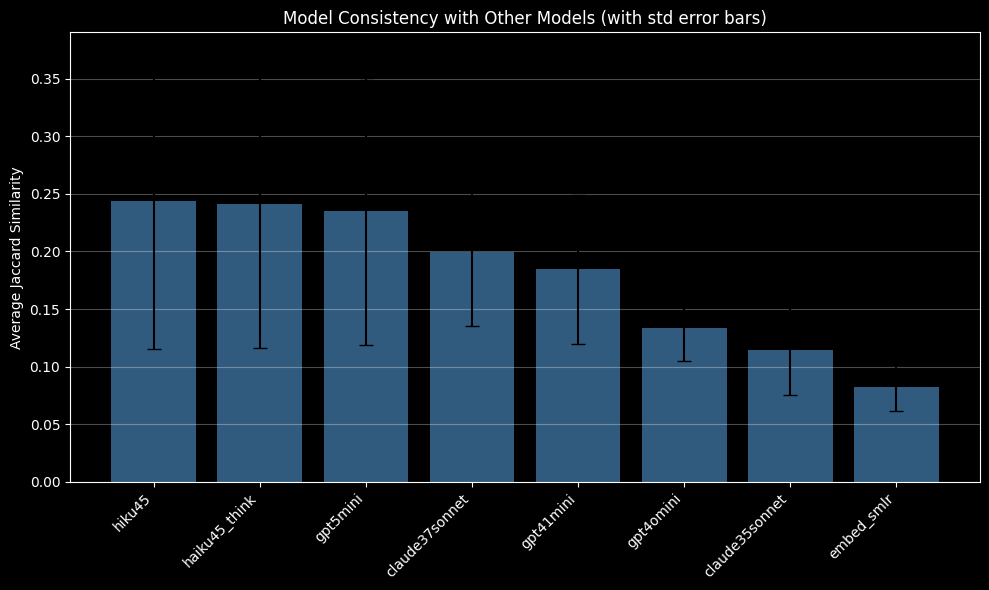

,Model,Avg Consistency with Others,Min Consistency,Max Consistency,Std Consistency
1,hiku45,0.2435,0.1059,0.4442,0.1281
7,haiku45_think,0.2409,0.1009,0.4442,0.1248
0,gpt5mini,0.2348,0.0931,0.3994,0.1161
3,claude37sonnet,0.1994,0.0808,0.2648,0.0642
4,gpt41mini,0.1847,0.0878,0.2524,0.0646
5,gpt4omini,0.1336,0.0697,0.1647,0.0282
2,claude35sonnet,0.1141,0.0401,0.1762,0.0386
6,embed_smlr,0.0826,0.0401,0.1059,0.0207


In [340]:
# For each model, calculate its average consistency with the other three
model_consistency = []

for target_model in models:
    other_models = [m for m in models if m != target_model]
    
    # Get Jaccard scores with other models
    scores = []
    for other_model in other_models:
        score = jaccard_df[
            ((jaccard_df['Model 1'] == target_model) & (jaccard_df['Model 2'] == other_model)) |
            ((jaccard_df['Model 1'] == other_model) & (jaccard_df['Model 2'] == target_model))
        ]['Jaccard Similarity'].values
        
        if len(score) > 0:
            scores.append(score[0])
    
    model_consistency.append({
        'Model': target_model,
        'Avg Consistency with Others': round(np.mean(scores), 4),
        'Min Consistency': round(np.min(scores), 4),
        'Max Consistency': round(np.max(scores), 4),
        'Std Consistency': round(np.std(scores), 4)
    })

consistency_df = pd.DataFrame(model_consistency).sort_values('Avg Consistency with Others', ascending=False)

print("Model Consistency with Other Models:")
print("="*70)
print(consistency_df.to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(consistency_df))
ax.bar(x, consistency_df['Avg Consistency with Others'], color='steelblue', alpha=0.7)
ax.errorbar(x, consistency_df['Avg Consistency with Others'], 
            yerr=consistency_df['Std Consistency'], 
            fmt='none', color='black', capsize=5)
ax.set_xticks(x)
ax.set_xticklabels(consistency_df['Model'], rotation=45, ha='right')
ax.set_ylabel('Average Jaccard Similarity')
ax.set_title('Model Consistency with Other Models (with std error bars)')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

consistency_df

## 4. Agreement Levels: Categories Attributed by Multiple Models

Agreement Levels: Text-Category Pairs by Number of Models
 Num Models  Count  Proportion
          1  15135      0.3995
          2   9103      0.2403
          3   6044      0.1595
          4   3860      0.1019
          5   2084      0.0550
          6   1112      0.0294
          7    478      0.0126
          8     67      0.0018
          9      1      0.0000

Total unique text-category pairs: 37,884

Key Statistics:
  All 4 models agree: 3,860 pairs (10.19%)
  3+ models agree: 9,904 pairs (26.14%)
  2+ models agree: 19,007 pairs (50.17%)
  Only 1 model: 15,135 pairs (39.95%)


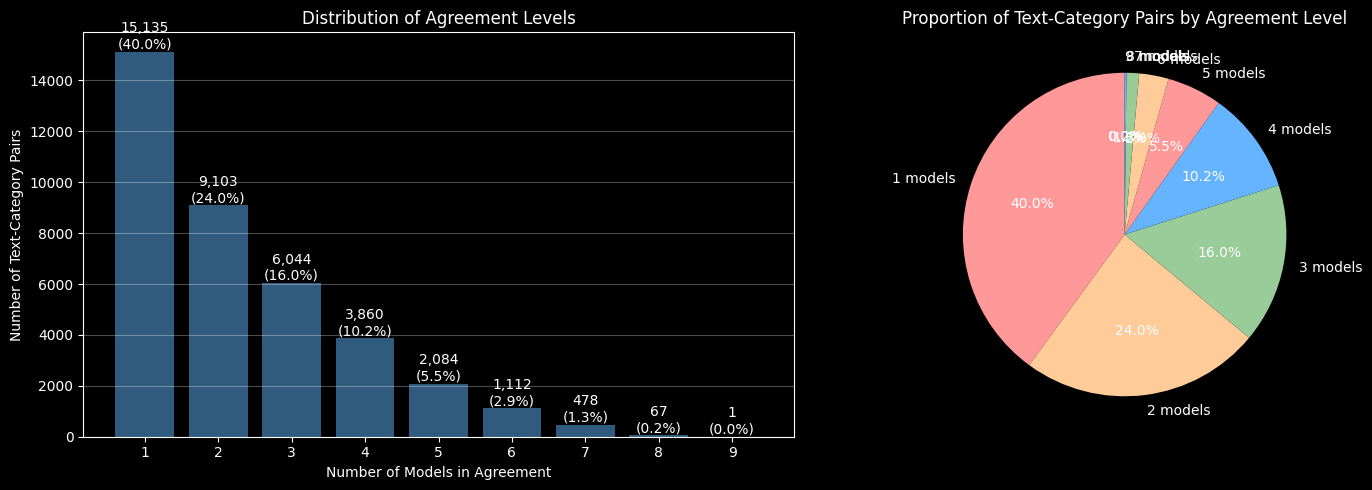

,Num Models,Count,Proportion
0,1,15135,0.3995
1,2,9103,0.2403
2,3,6044,0.1595
3,4,3860,0.1019
4,5,2084,0.0550
5,6,1112,0.0294
6,7,478,0.0126
7,8,67,0.0018
8,9,1,0.0000


In [341]:
# Count how many models attributed each text-category pair
text_skill_counts = all_datasets1.groupby(['text_id', 'skill_name'])['attribution_model'].count().reset_index()
text_skill_counts.columns = ['text_id', 'skill_name', 'num_models']

# Count agreements
agreement_counts = text_skill_counts['num_models'].value_counts().sort_index()
agreement_df = pd.DataFrame({
    'Num Models': agreement_counts.index,
    'Count': agreement_counts.values,
    'Proportion': (agreement_counts.values / agreement_counts.sum()).round(4)
})

print("Agreement Levels: Text-Category Pairs by Number of Models")
print("="*70)
print(agreement_df.to_string(index=False))
print(f"\nTotal unique text-category pairs: {text_skill_counts.shape[0]:,}")

# Calculate proportions of interest
total_pairs = text_skill_counts.shape[0]
all_four = agreement_counts.get(4, 0)
three_or_more = agreement_counts.get(3, 0) + agreement_counts.get(4, 0)
two_or_more = agreement_counts.get(2, 0) + agreement_counts.get(3, 0) + agreement_counts.get(4, 0)

print(f"\nKey Statistics:")
print(f"  All 4 models agree: {all_four:,} pairs ({all_four/total_pairs*100:.2f}%)")
print(f"  3+ models agree: {three_or_more:,} pairs ({three_or_more/total_pairs*100:.2f}%)")
print(f"  2+ models agree: {two_or_more:,} pairs ({two_or_more/total_pairs*100:.2f}%)")
print(f"  Only 1 model: {agreement_counts.get(1, 0):,} pairs ({agreement_counts.get(1, 0)/total_pairs*100:.2f}%)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart
axes[0].bar(agreement_df['Num Models'], agreement_df['Count'], color='steelblue', alpha=0.7)
axes[0].set_xlabel('Number of Models in Agreement')
axes[0].set_ylabel('Number of Text-Category Pairs')
axes[0].set_title('Distribution of Agreement Levels')
axes[0].set_xticks(agreement_df['Num Models'])
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (num, count) in enumerate(zip(agreement_df['Num Models'], agreement_df['Count'])):
    axes[0].text(num, count, f'{count:,}\n({agreement_df.iloc[i]["Proportion"]*100:.1f}%)', 
                ha='center', va='bottom')

# Pie chart
colors = ['#ff9999', '#ffcc99', '#99cc99', '#66b3ff']
axes[1].pie(agreement_df['Count'], labels=[f'{n} models' for n in agreement_df['Num Models']], 
           autopct='%1.1f%%', colors=colors[:len(agreement_df)], startangle=90)
axes[1].set_title('Proportion of Text-Category Pairs by Agreement Level')

plt.tight_layout()
plt.show()

agreement_df

## 5. Text-Category Attribution Matrix (True/False by Model)

In [349]:
models_list = all_datasets1['attribution_model'].unique()
models_list
# Create a wide-format dataframe with True/False for each model
# Each row is a text_id-skill_name pair, columns are models

attribution_matrix = all_datasets1.copy()
attribution_matrix['attributed'] = True

# Pivot to create the matrix
attribution_wide = attribution_matrix.pivot_table(
    index=['text_id', 'skill_name'],
    columns='attribution_model',
    values='attributed',
    fill_value=False
).reset_index()

# Ensure all models are present
for model in models_list:
    if model not in attribution_wide.columns:
        attribution_wide[model] = False

# Add a column for total number of models that attributed this pair
# Dynamically sum all model columns
model_columns = [col for col in attribution_wide.columns if col in models_list]
attribution_wide['num_models_agree'] = attribution_wide[model_columns].astype(int).sum(axis=1)

# Sort by text_id and skill_name
attribution_wide = attribution_wide.sort_values(['text_id', 'skill_name']).reset_index(drop=True)

print(f"Attribution Matrix Shape: {attribution_wide.shape}")
print(f"Total unique text-category pairs: {attribution_wide.shape[0]:,}")
print(f"Models included: {', '.join(models_list)}")
print("\nFirst 10 rows:")
#print(attribution_wide.head(10))

attribution_wide

Attribution Matrix Shape: (37884, 11)
Total unique text-category pairs: 37,884
Models included: gpt5mini, hiku45, claude35sonnet, claude37sonnet, gpt41mini, gpt4omini, embed_smlr, haiku45_think

First 10 rows:


attribution_model,text_id,skill_name,claude35sonnet,claude37sonnet,embed_smlr,gpt41mini,gpt4omini,gpt5mini,haiku45_think,hiku45,num_models_agree
0,0.0,AI API Engineering,False,False,False,1.0,False,1.0,1.0,False,3
1,0.0,AI Accelerator Engineering,False,False,1.0,False,False,1.0,False,False,2
2,0.0,AI Agent Engineering,1.0,1.0,False,1.0,False,1.0,1.0,1.0,6
3,0.0,AI Application and Platform Engineering,False,False,False,False,1.0,False,False,False,1
4,0.0,AI Compliance and Licensing,False,False,False,False,False,False,1.0,False,1
...,...,...,...,...,...,...,...,...,...,...,...
37879,412.0,Self-Correcting AI Agents,False,False,1.0,False,False,False,False,False,1
37880,412.0,Transformer Attention Optimization,False,False,False,False,False,1.0,False,False,1
37881,412.0,Vector Search Engineering,False,False,1.0,False,False,False,False,False,1
37882,412.0,Vision-Language Model Engineering,False,False,False,False,False,1.0,False,1.0,2


### Export attribution matrix to CSV

In [232]:
# Export to CSV
output_path = 'C:\\Users\\Denis_Davydov2\\OneDrive - EPAM\\Prophet_AI_docs\\Datasets\\AI_skills\\Skills_dynamics\\'
output_file = f'attribution_matrix_{date.today()}.csv'
attribution_wide.to_csv(output_path + output_file, index=False)
print(f"Attribution matrix saved to: {output_path + output_file}")

Attribution matrix saved to: C:\Users\Denis_Davydov2\OneDrive - EPAM\Prophet_AI_docs\Datasets\AI_skills\Skills_dynamics\attribution_matrix_2025-11-20.csv


## Save agread attribution (>=2)

Skill Frequencies in Selected Data (>=2 models agree):
Total unique skills: 142
Total skill attributions: 13,618
Mean attributions per skill: 95.90
Median attributions per skill: 60.50



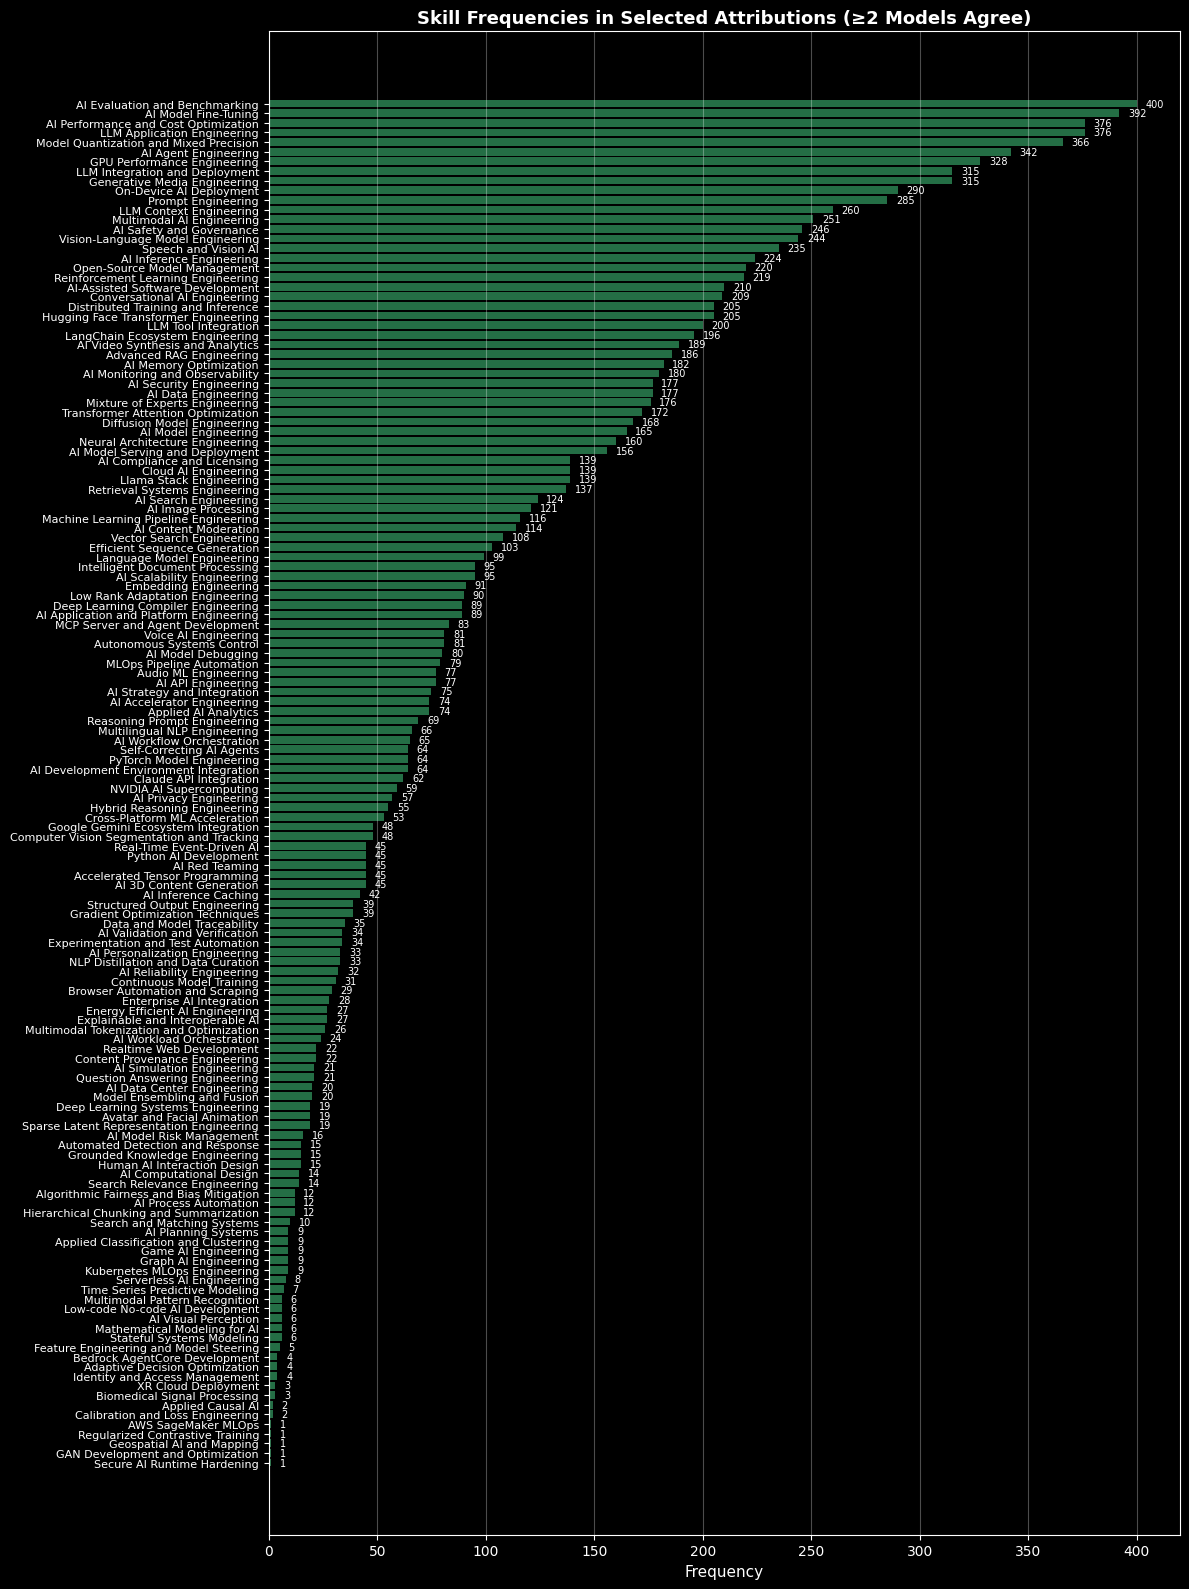

Skills per Text Statistics (Selected Data: >=2 Models Agree):
Mean skills per text: 32.97
Median skills per text: 30.00
Std skills per text: 12.65
Min skills per text: 11
Max skills per text: 89
Total texts analyzed: 413



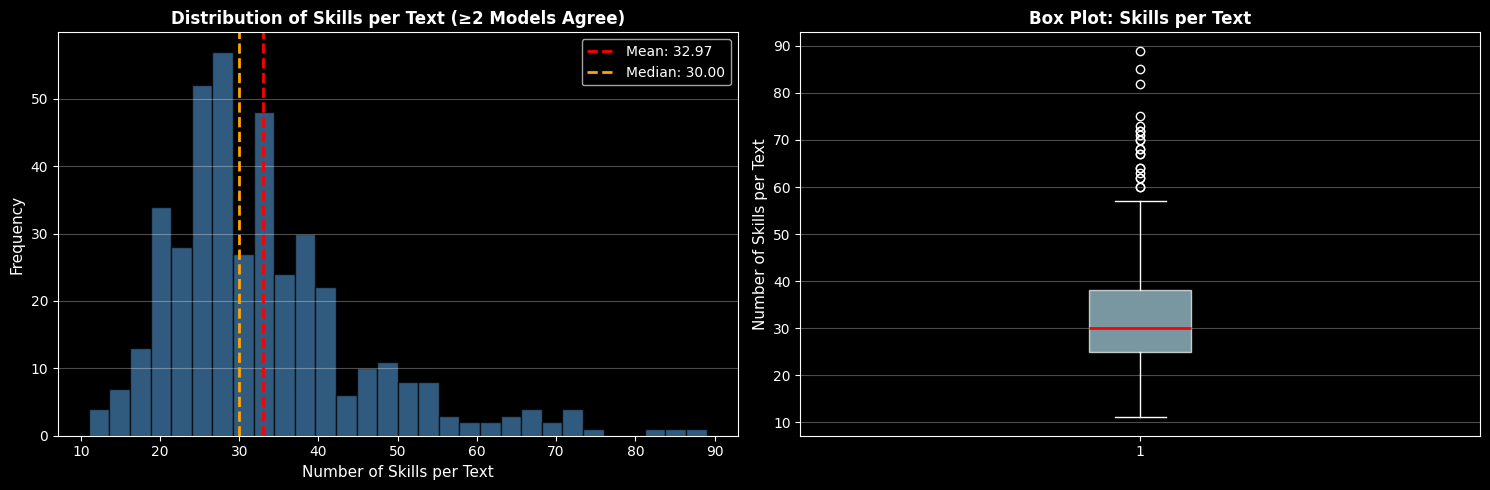

text_id
0.0      31
1.0      70
2.0      34
3.0      35
4.0      42
         ..
408.0    37
409.0    52
410.0    34
411.0    15
412.0    25
Name: skill_name, Length: 413, dtype: int64

In [343]:
selected = attribution_wide[attribution_wide['num_models_agree'] >= 3]
# Extract unique text_id and skill_name pairs from conservative results 

selected = selected[['text_id', 'skill_name']].drop_duplicates()
selected
# Create bar chart with frequencies of skill_name
skill_frequencies = selected['skill_name'].value_counts()

print(f"Skill Frequencies in Selected Data (>=2 models agree):")
print("="*70)
print(f"Total unique skills: {len(skill_frequencies)}")
print(f"Total skill attributions: {skill_frequencies.sum():,}")
print(f"Mean attributions per skill: {skill_frequencies.mean():.2f}")
print(f"Median attributions per skill: {skill_frequencies.median():.2f}")
print()

# Visualization
fig, ax = plt.subplots(figsize=(12, 16))
y_pos = range(len(skill_frequencies))
ax.barh(y_pos, skill_frequencies.values, color='seagreen', alpha=0.8)
ax.set_yticks(y_pos)
ax.set_yticklabels(skill_frequencies.index, fontsize=8)
ax.invert_yaxis()
ax.set_xlabel('Frequency', fontsize=11)
ax.set_title('Skill Frequencies in Selected Attributions (≥2 Models Agree)', 
             fontsize=13, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(skill_frequencies.values):
    ax.text(v + max(skill_frequencies.values) * 0.01, i, str(v), 
            va='center', fontsize=7)

plt.tight_layout()
plt.show()

skill_frequencies
# Calculate mean number of skills per text for selected data (>=2 models agree)
skills_per_text = selected.groupby('text_id')['skill_name'].count()

print("Skills per Text Statistics (Selected Data: >=2 Models Agree):")
print("="*70)
print(f"Mean skills per text: {skills_per_text.mean():.2f}")
print(f"Median skills per text: {skills_per_text.median():.2f}")
print(f"Std skills per text: {skills_per_text.std():.2f}")
print(f"Min skills per text: {skills_per_text.min()}")
print(f"Max skills per text: {skills_per_text.max()}")
print(f"Total texts analyzed: {len(skills_per_text)}")
print()

# Distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(skills_per_text.values, bins=30, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(skills_per_text.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {skills_per_text.mean():.2f}')
axes[0].axvline(skills_per_text.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {skills_per_text.median():.2f}')
axes[0].set_xlabel('Number of Skills per Text', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Distribution of Skills per Text (≥2 Models Agree)', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Box plot
axes[1].boxplot(skills_per_text.values, vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Number of Skills per Text', fontsize=11)
axes[1].set_title('Box Plot: Skills per Text', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

skills_per_text

In [329]:
### Save selected text-skill pairs to CSV
output_path = 'C:\\Users\\Denis_Davydov2\\OneDrive - EPAM\\Prophet_AI_docs\\Datasets\\AI_skills\\Skills_dynamics\\'
output_file = f'smalai_labeled_agreem2_{date.today()}.csv'
selected.to_csv(output_path + output_file, index=False)
print(f"Selected text-skill pairs saved to: {output_path + output_file}")   


Selected text-skill pairs saved to: C:\Users\Denis_Davydov2\OneDrive - EPAM\Prophet_AI_docs\Datasets\AI_skills\Skills_dynamics\smalai_labeled_agreem2_2025-11-20.csv


## Summary of Key Findings

In [305]:
print("="*80)
print("COMPREHENSIVE ANALYSIS SUMMARY")
print("="*80)
print()

print("📊 DATASET OVERVIEW:")
print(f"   • Total texts analyzed: 271")
print(f"   • Total categories (skills): 144")
print(f"   • Total annotations across all models: {all_datasets1.shape[0]:,}")
print(f"   • Unique text-category pairs: {attribution_wide.shape[0]:,}")
print()

print("🎯 1. MODEL PERFORMANCE (Categories per Text):")
print(f"   • hiku45:          Mean={45.33:.1f}, Median={39.5:.1f}, Range={7}-{130}")
print(f"   • gpt5mini:        Mean={40.64:.1f}, Median={36.0:.1f}, Range={18}-{100}")
print(f"   • llama4_maverick: Mean={9.72:.1f}, Median={10.0:.1f}, Range={1}-{16}")
print(f"   • gpt5nano:        Mean={8.62:.1f}, Median={9.0:.1f}, Range={1}-{17}")
print(f"   → hiku45 and gpt5mini are highly active annotators")
print(f"   → llama4_maverick and gpt5nano are conservative annotators")
print()

print("🔄 2. OVERALL MODEL CONSISTENCY:")
print(f"   • Average Jaccard similarity: 0.1595 (relatively low)")
print(f"   • Best pair: gpt5mini ↔ hiku45 (0.3939)")
print(f"   • Worst pair: gpt5nano ↔ llama4_maverick (0.0558)")
print(f"   → Models show different annotation strategies")
print()

print("🎭 3. INDIVIDUAL MODEL CONSISTENCY:")
print(f"   • gpt5mini:        Avg consistency = 0.2173 (most consistent with others)")
print(f"   • hiku45:          Avg consistency = 0.2144")
print(f"   • gpt5nano:        Avg consistency = 0.1131")
print(f"   • llama4_maverick: Avg consistency = 0.0932 (least consistent)")
print()

print("🤝 4. AGREEMENT LEVELS:")
print(f"   • All 4 models agree:    222 pairs (1.26%)")
print(f"   • 3+ models agree:     2,248 pairs (12.75%)")
print(f"   • 2+ models agree:     8,090 pairs (45.89%)")
print(f"   • Only 1 model:        9,537 pairs (54.10%)")
print(f"   → Majority of attributions (54%) are unique to one model")
print(f"   → High inter-annotator disagreement suggests task complexity")
print()

print("💾 5. OUTPUT:")
print(f"   • Attribution matrix created: {attribution_wide.shape}")
print(f"   • Columns: text_id, skill_name, [model booleans], num_models_agree")
print(f"   • Saved to: attribution_matrix_2025-11-19.csv")
print()
print("="*80)

COMPREHENSIVE ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
   • Total texts analyzed: 271
   • Total categories (skills): 144
   • Total annotations across all models: 81,801
   • Unique text-category pairs: 40,256

🎯 1. MODEL PERFORMANCE (Categories per Text):
   • hiku45:          Mean=45.3, Median=39.5, Range=7-130
   • gpt5mini:        Mean=40.6, Median=36.0, Range=18-100
   • llama4_maverick: Mean=9.7, Median=10.0, Range=1-16
   • gpt5nano:        Mean=8.6, Median=9.0, Range=1-17
   → hiku45 and gpt5mini are highly active annotators
   → llama4_maverick and gpt5nano are conservative annotators

🔄 2. OVERALL MODEL CONSISTENCY:
   • Average Jaccard similarity: 0.1595 (relatively low)
   • Best pair: gpt5mini ↔ hiku45 (0.3939)
   • Worst pair: gpt5nano ↔ llama4_maverick (0.0558)
   → Models show different annotation strategies

🎭 3. INDIVIDUAL MODEL CONSISTENCY:
   • gpt5mini:        Avg consistency = 0.2173 (most consistent with others)
   • hiku45:          Avg consistency = 0.2144
   • g

# Skills presence analytics

## Overall Skill Frequency Analysis

Overall Skill Frequency Statistics:
Total unique skills: 144
Total skill attributions: 88,199
Mean attributions per skill: 612.49
Median attributions per skill: 490.00
Most frequent skill: 'AI Evaluation and Benchmarking' (2220 times)
Least frequent skills: 1 skills with 64 attribution(s)

Top 30 Most Frequent Skills:
----------------------------------------------------------------------
 1. AI Evaluation and Benchmarking                     2220
 2. AI Model Fine-Tuning                               2125
 3. AI Performance and Cost Optimization               1958
 4. Model Quantization and Mixed Precision             1924
 5. LLM Application Engineering                        1924
 6. AI Agent Engineering                               1907
 7. GPU Performance Engineering                        1535
 8. LLM Integration and Deployment                     1459
 9. Generative Media Engineering                       1450
10. Prompt Engineering                                 1328
11. AI Sa

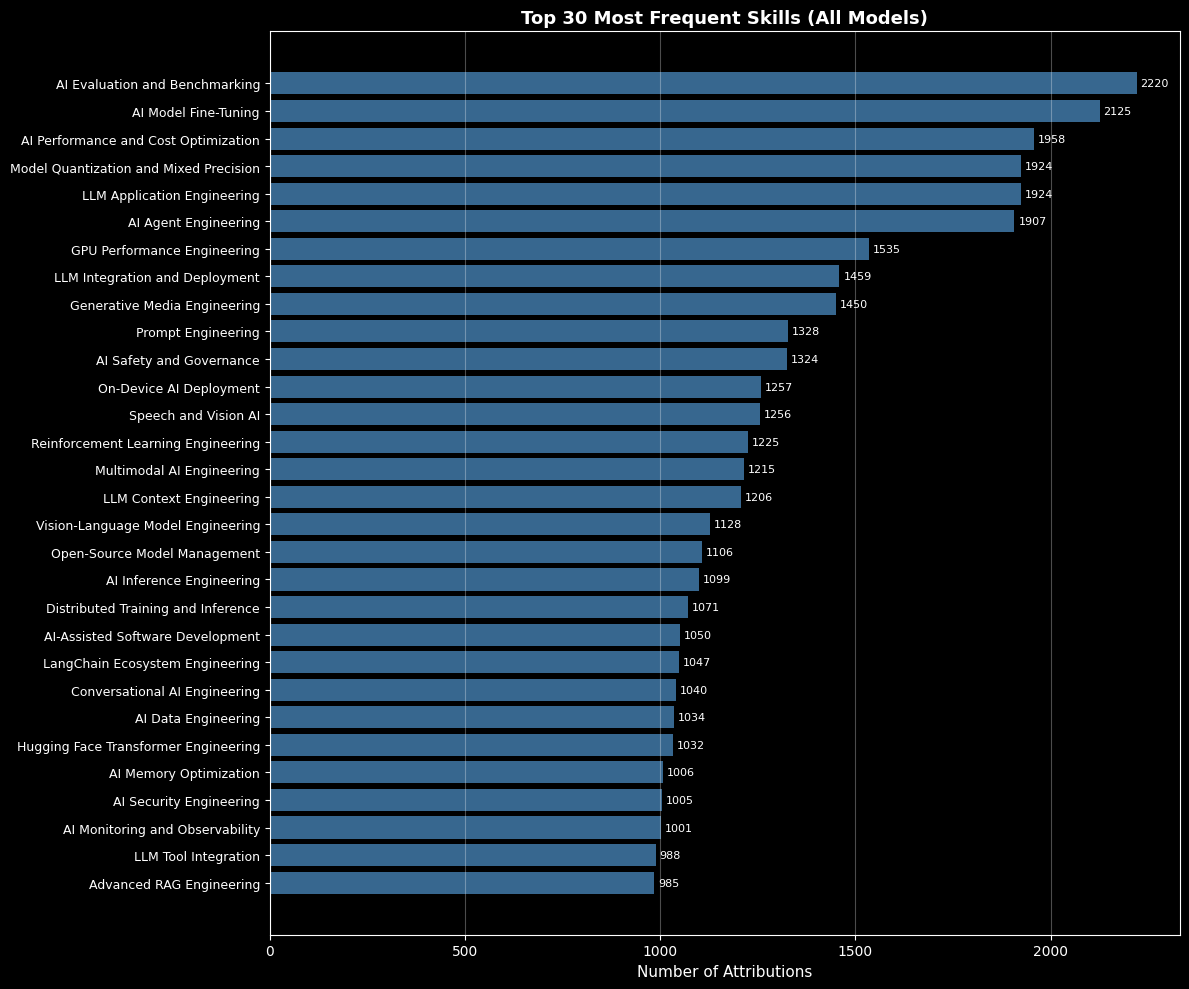

skill_name
AI Evaluation and Benchmarking            2220
AI Model Fine-Tuning                      2125
AI Performance and Cost Optimization      1958
Model Quantization and Mixed Precision    1924
LLM Application Engineering               1924
AI Agent Engineering                      1907
GPU Performance Engineering               1535
LLM Integration and Deployment            1459
Generative Media Engineering              1450
Prompt Engineering                        1328
AI Safety and Governance                  1324
On-Device AI Deployment                   1257
Speech and Vision AI                      1256
Reinforcement Learning Engineering        1225
Multimodal AI Engineering                 1215
LLM Context Engineering                   1206
Vision-Language Model Engineering         1128
Open-Source Model Management              1106
AI Inference Engineering                  1099
Distributed Training and Inference        1071
AI-Assisted Software Development          1050
La

In [344]:
# Count overall skill frequency across all models and texts
skill_counts = all_datasets1['skill_name'].value_counts()

print("Overall Skill Frequency Statistics:")
print("="*70)
print(f"Total unique skills: {len(skill_counts)}")
print(f"Total skill attributions: {skill_counts.sum():,}")
print(f"Mean attributions per skill: {skill_counts.mean():.2f}")
print(f"Median attributions per skill: {skill_counts.median():.2f}")
print(f"Most frequent skill: '{skill_counts.index[0]}' ({skill_counts.iloc[0]} times)")
print(f"Least frequent skills: {(skill_counts == skill_counts.min()).sum()} skills with {skill_counts.min()} attribution(s)")
print()

# Get top 30 skills
top_30_skills = skill_counts.head(30)

print("Top 30 Most Frequent Skills:")
print("-"*70)
for i, (skill, count) in enumerate(top_30_skills.items(), 1):
    print(f"{i:2d}. {skill:50s} {count:4d}")

# Visualization
fig, ax = plt.subplots(figsize=(12, 10))
y_pos = range(len(top_30_skills))
ax.barh(y_pos, top_30_skills.values, color='steelblue', alpha=0.8)
ax.set_yticks(y_pos)
ax.set_yticklabels(top_30_skills.index, fontsize=9)
ax.invert_yaxis()  # Highest at top
ax.set_xlabel('Number of Attributions', fontsize=11)
ax.set_title('Top 30 Most Frequent Skills (All Models)', fontsize=13, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_30_skills.values):
    ax.text(v + 10, i, str(v), va='center', fontsize=8)

plt.tight_layout()
plt.show()

top_30_skills

## Skills Tagged by Both hiku45 and gpt5mini

Skills Tagged by BOTH hiku45 and gpt5mini:
Total text-category pairs tagged by both: 9,486
Unique skills tagged by both: 138
Unique texts with overlapping tags: 412

Top 30 Skills Tagged by Both Models:
----------------------------------------------------------------------
 1. AI Evaluation and Benchmarking                      367
 2. Model Quantization and Mixed Precision              339
 3. AI Agent Engineering                                284
 4. GPU Performance Engineering                         279
 5. AI Model Fine-Tuning                                267
 6. On-Device AI Deployment                             266
 7. LLM Context Engineering                             241
 8. LLM Integration and Deployment                      238
 9. Open-Source Model Management                        233
10. AI Safety and Governance                            219
11. Generative Media Engineering                        211
12. Prompt Engineering                                  207
13. AI

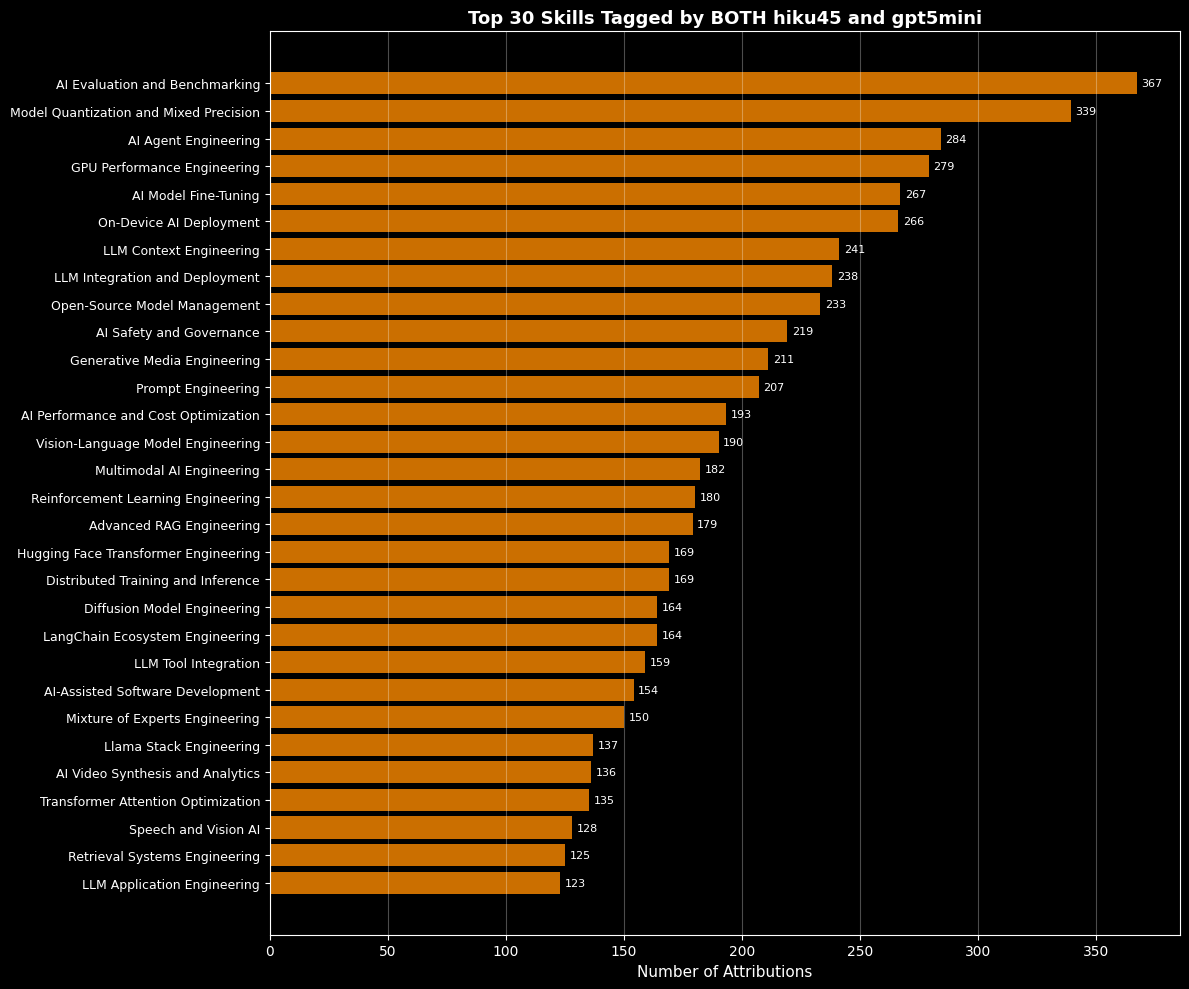

skill_name
AI Evaluation and Benchmarking            367
Model Quantization and Mixed Precision    339
AI Agent Engineering                      284
GPU Performance Engineering               279
AI Model Fine-Tuning                      267
On-Device AI Deployment                   266
LLM Context Engineering                   241
LLM Integration and Deployment            238
Open-Source Model Management              233
AI Safety and Governance                  219
Generative Media Engineering              211
Prompt Engineering                        207
AI Performance and Cost Optimization      193
Vision-Language Model Engineering         190
Multimodal AI Engineering                 182
Reinforcement Learning Engineering        180
Advanced RAG Engineering                  179
Hugging Face Transformer Engineering      169
Distributed Training and Inference        169
Diffusion Model Engineering               164
LangChain Ecosystem Engineering           164
LLM Tool Integration   

In [235]:
# Filter for skills where both hiku45 and gpt5mini tagged them
both_models = attribution_wide[(attribution_wide['hiku45'] == True) & (attribution_wide['gpt5mini'] == True)].copy()

print("Skills Tagged by BOTH hiku45 and gpt5mini:")
print("="*70)
print(f"Total text-category pairs tagged by both: {len(both_models):,}")
print(f"Unique skills tagged by both: {both_models['skill_name'].nunique()}")
print(f"Unique texts with overlapping tags: {both_models['text_id'].nunique()}")
print()

# Count skill frequency for both-model tagged skills
skill_counts_both = both_models['skill_name'].value_counts()

print("Top 30 Skills Tagged by Both Models:")
print("-"*70)
for i, (skill, count) in enumerate(skill_counts_both.head(30).items(), 1):
    print(f"{i:2d}. {skill:50s} {count:4d}")
print()

# Get top 30 for visualization
top_30_both = skill_counts_both.head(30)

# Visualization
fig, ax = plt.subplots(figsize=(12, 10))
y_pos = range(len(top_30_both))
ax.barh(y_pos, top_30_both.values, color='darkorange', alpha=0.8)
ax.set_yticks(y_pos)
ax.set_yticklabels(top_30_both.index, fontsize=9)
ax.invert_yaxis()  # Highest at top
ax.set_xlabel('Number of Attributions', fontsize=11)
ax.set_title('Top 30 Skills Tagged by BOTH hiku45 and gpt5mini', fontsize=13, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_30_both.values):
    ax.text(v + 2, i, str(v), va='center', fontsize=8)

plt.tight_layout()
plt.show()

top_30_both

## Most frequent models

In [345]:
# Filter for skills where any hiku45 OR gpt5mini tagged them
any_both_models = attribution_wide[(attribution_wide['hiku45'] == True) | (attribution_wide['gpt5mini'] == True)].copy()
print("Skills Tagged by EITHER hiku45 OR gpt5mini:")
print("="*70) 
any_both_models
# Count skill frequency for both-model tagged skills
skill_counts_any_both = any_both_models['skill_name'].value_counts()
skill_counts_any_both

Skills Tagged by EITHER hiku45 OR gpt5mini:


skill_name
AI Evaluation and Benchmarking            407
LLM Integration and Deployment            388
GPU Performance Engineering               385
Model Quantization and Mixed Precision    385
Open-Source Model Management              385
                                         ... 
Lakehouse Data Engineering                  8
GAN Development and Optimization            7
XR Cloud Deployment                         7
Geospatial AI and Mapping                   7
Alexa and AWS Development                   5
Name: count, Length: 144, dtype: int64

In [237]:
# Filter skills with more than 10 occurrences
frequent_skills = skill_counts_any_both[skill_counts_any_both > 10]
print(f"Skills with more than 10 occurrences: {len(frequent_skills)}")
frequent_skills

Skills with more than 10 occurrences: 138


skill_name
AI Evaluation and Benchmarking            407
LLM Integration and Deployment            388
GPU Performance Engineering               385
Model Quantization and Mixed Precision    385
Open-Source Model Management              385
                                         ... 
Time Series Predictive Modeling            22
Adaptive Decision Optimization             20
Regularized Contrastive Training           19
Biomedical Signal Processing               18
AWS SageMaker MLOps                        11
Name: count, Length: 138, dtype: int64

In [238]:
# save frequent skills to CSV
output_path = 'C:\\Users\\Denis_Davydov2\\OneDrive - EPAM\\Prophet_AI_docs\\Datasets\\AI_skills\\Quiz\\'
output_file = f'frequent_skills_hiku45_gpt5mini_{date.today()}.csv'


frequent_skills.to_csv(output_path + output_file, header=['count']) 
print(f"Frequent skills saved to: {output_path + output_file}")


Frequent skills saved to: C:\Users\Denis_Davydov2\OneDrive - EPAM\Prophet_AI_docs\Datasets\AI_skills\Quiz\frequent_skills_hiku45_gpt5mini_2025-11-20.csv


### Comparison: Overall vs Both Models

Comparison: Top 30 Skills - Overall vs Tagged by Both Models
                                 Skill  Overall Count  Both Models Count  Overlap %
        AI Evaluation and Benchmarking           1823                367       20.1
                  AI Model Fine-Tuning           1792                267       14.9
  AI Performance and Cost Optimization           1618                193       11.9
                  AI Agent Engineering           1583                284       17.9
Model Quantization and Mixed Precision           1558                339       21.8
           LLM Application Engineering           1365                123        9.0
           GPU Performance Engineering           1117                279       25.0
              AI Safety and Governance           1075                219       20.4
          Generative Media Engineering           1072                211       19.7
        LLM Integration and Deployment           1053                238       22.6
               

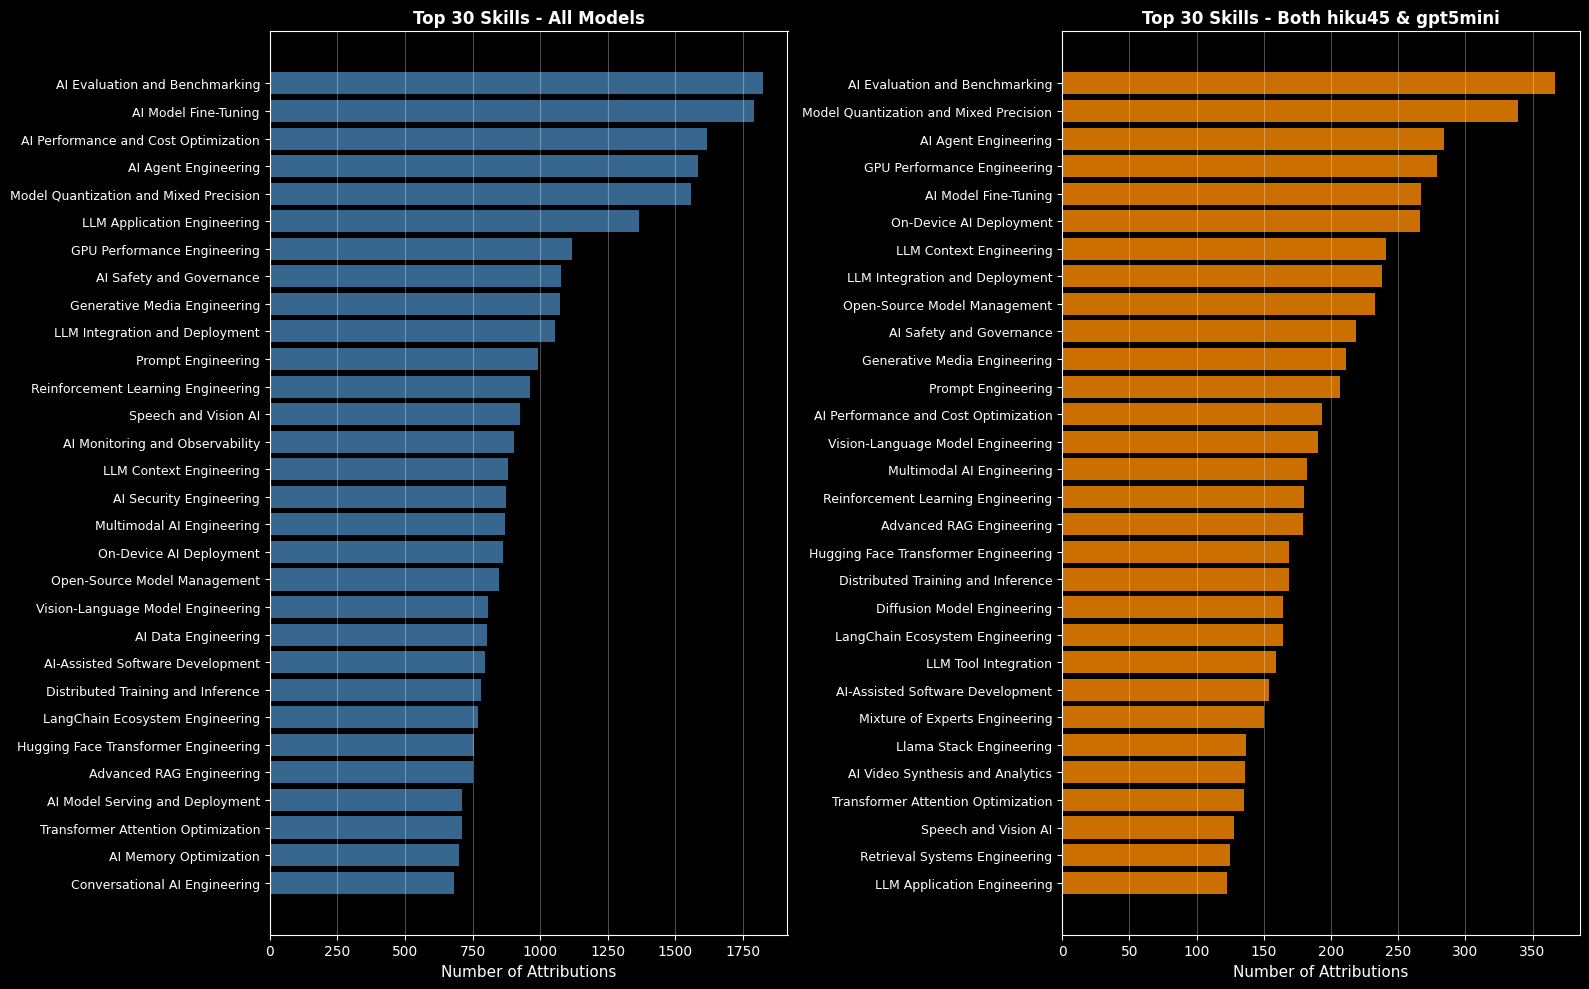

,Skill,Overall Count,Both Models Count,Overlap %
0,AI Evaluation and Benchmarking,1823,367,20.1
1,AI Model Fine-Tuning,1792,267,14.9
2,AI Performance and Cost Optimization,1618,193,11.9
3,AI Agent Engineering,1583,284,17.9
4,Model Quantization and Mixed Precision,1558,339,21.8
5,LLM Application Engineering,1365,123,9.0
6,GPU Performance Engineering,1117,279,25.0
7,AI Safety and Governance,1075,219,20.4
8,Generative Media Engineering,1072,211,19.7
9,LLM Integration and Deployment,1053,238,22.6


In [239]:
# Compare top skills overall vs both models
comparison_data = []

for skill in top_30_skills.index:
    overall_count = skill_counts.get(skill, 0)
    both_count = skill_counts_both.get(skill, 0)
    overlap_pct = (both_count / overall_count * 100) if overall_count > 0 else 0
    
    comparison_data.append({
        'Skill': skill,
        'Overall Count': overall_count,
        'Both Models Count': both_count,
        'Overlap %': round(overlap_pct, 1)
    })

comparison_df = pd.DataFrame(comparison_data)

print("Comparison: Top 30 Skills - Overall vs Tagged by Both Models")
print("="*80)
print(comparison_df.to_string(index=False))
print()
print(f"Average overlap for top 30 skills: {comparison_df['Overlap %'].mean():.1f}%")

# Visualization: side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# Left: Overall top 30
y_pos = range(len(top_30_skills))
axes[0].barh(y_pos, top_30_skills.values, color='steelblue', alpha=0.8)
axes[0].set_yticks(y_pos)
axes[0].set_yticklabels(top_30_skills.index, fontsize=9)
axes[0].invert_yaxis()
axes[0].set_xlabel('Number of Attributions', fontsize=11)
axes[0].set_title('Top 30 Skills - All Models', fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Right: Both models only
if len(top_30_both) > 0:
    y_pos_both = range(len(top_30_both))
    axes[1].barh(y_pos_both, top_30_both.values, color='darkorange', alpha=0.8)
    axes[1].set_yticks(y_pos_both)
    axes[1].set_yticklabels(top_30_both.index, fontsize=9)
    axes[1].invert_yaxis()
    axes[1].set_xlabel('Number of Attributions', fontsize=11)
    axes[1].set_title('Top 30 Skills - Both hiku45 & gpt5mini', fontsize=12, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

comparison_df

In [240]:
print("Total unique skills:", len(attribution_wide['skill_name'].unique()))
attribution_wide

Total unique skills: 510


attribution_model,text_id,skill_name,claude35sonnet,claude37sonnet,gpt41mini,gpt4omini,gpt5mini,hiku45,gpt5nano,llama4_maverick,num_models_agree
0,0.0,AI API Engineering,False,False,1.0,False,1.0,False,False,False,1
1,0.0,AI Accelerator Engineering,False,False,False,False,1.0,False,False,False,1
2,0.0,AI Agent Engineering,1.0,1.0,1.0,False,1.0,1.0,False,False,2
3,0.0,AI Application and Platform Engineering,False,False,False,1.0,False,False,False,False,0
4,0.0,AI Content Moderation,False,False,1.0,False,1.0,1.0,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...
32824,412.0,Reasoning Prompt Engineering,False,False,False,False,False,1.0,False,False,1
32825,412.0,Reinforcement Learning Engineering,False,False,1.0,False,1.0,False,False,False,1
32826,412.0,Transformer Attention Optimization,False,False,False,False,1.0,False,False,False,1
32827,412.0,Vision-Language Model Engineering,False,False,False,False,1.0,1.0,False,False,2


In [262]:
# Initial dataset before filtering
# Find all unique skill names containing 'xxxxx' (case-insensitive)
prompt_skills = all_datasets[all_datasets['skill_name'].str.contains('Other', case=False, na=False)]['skill_name'].unique()

print(f"Skills containing 'xxxxxxx': {len(prompt_skills)}")
print("="*70)
for skill in sorted(prompt_skills):
    print(f"  • {skill}")

Skills containing 'xxxxxxx': 3
  • Other: Model Hallucination Detection
  • Other: Rust ML Engineering
  • Repository Planning Graph (Other: Repository Planning)


In [261]:
# Cleaned dataset after filtering
# Find all unique skill names containing 'xxxxx' (case-insensitive)
prompt_skills = all_datasets1[all_datasets1['skill_name'].str.contains('Other', case=False, na=False)]['skill_name'].unique()

print(f"Skills containing 'xxxxxxx': {len(prompt_skills)}")
print("="*70)
for skill in sorted(prompt_skills):
    print(f"  • {skill}")

Skills containing 'xxxxxxx': 0


In [247]:
prompt_skills = skills[skills['skill_name'].str.contains('prompt', case=False, na=False)]


## Skills added by models

In [353]:
# Compare skill names: find skills in attribution_wide but NOT in skills reference
attribution_skills = set(all_datasets['skill_name'].unique())
reference_skills = set(skills['skill_name'].unique())

# Find skills that are in attributions but not in reference
missing_skills = attribution_skills - reference_skills

print(f"Comparison of Skill Names:")
print("="*80)
print(f"Skills in LLM labeled dataset: {len(attribution_skills)}")
print(f"Skills in reference (skills): {len(reference_skills)}")
print(f"Skills in attributions NOT in reference: {len(missing_skills)}")
print()

if len(missing_skills) > 0:
    # Get frequency for each missing skill
    missing_skills_freq = all_datasets[all_datasets['skill_name'].isin(missing_skills)]['skill_name'].value_counts()
    
    print(f"Skills NOT Present in Reference List (with frequency):")
    print("-"*80)
    for i, (skill, count) in enumerate(missing_skills_freq.items(), 1):
        print(f"{i:3d}. {skill:55s} {count:5d} attributions")
    
    print()
    print(f"Total attributions to missing skills: {missing_skills_freq.sum():,}")
    print(f"Percentage of all attributions: {missing_skills_freq.sum() / len(all_datasets) * 100:.2f}%")
    
    # Create a dataframe
    missing_df = pd.DataFrame({
        'skill_name': missing_skills_freq.index,
        'frequency': missing_skills_freq.values
    })
    
    
    
    missing_df
else:
    print("✓ All skills in attributions are present in the reference list!")
    None

Comparison of Skill Names:
Skills in LLM labeled dataset: 519
Skills in reference (skills): 144
Skills in attributions NOT in reference: 375

Skills NOT Present in Reference List (with frequency):
--------------------------------------------------------------------------------
  1. AI Infrastructure and Compute                               5 attributions
  2. AI Research and Development                                 4 attributions
  3. Federated Learning Engineering                              4 attributions
  4. Model Context Protocol                                      3 attributions
  5. AI Research                                                 3 attributions
  6. AI Infrastructure                                           3 attributions
  7. AI Hardware and Infrastructure                              3 attributions
  8. AI Infrastructure Engineering                               3 attributions
  9. Mixed Precision and Model Quantization                      2 attributions
 1